In [1]:
!git clone https://github.com/SoosanEXE/FYP.git

Cloning into 'FYP'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 204 (delta 17), reused 27 (delta 11), pack-reused 168
Receiving objects: 100% (204/204), 105.91 MiB | 12.14 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.


In [6]:
import pandas as pd
df_nsl = pd.read_csv("FYP/nslkdd.csv")
df_unsw = pd.read_csv("FYP/unsw.csv")

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
def col_countplot(col, train_data=df_nsl):
    fig, ax = plt.subplots(figsize=(12,9))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

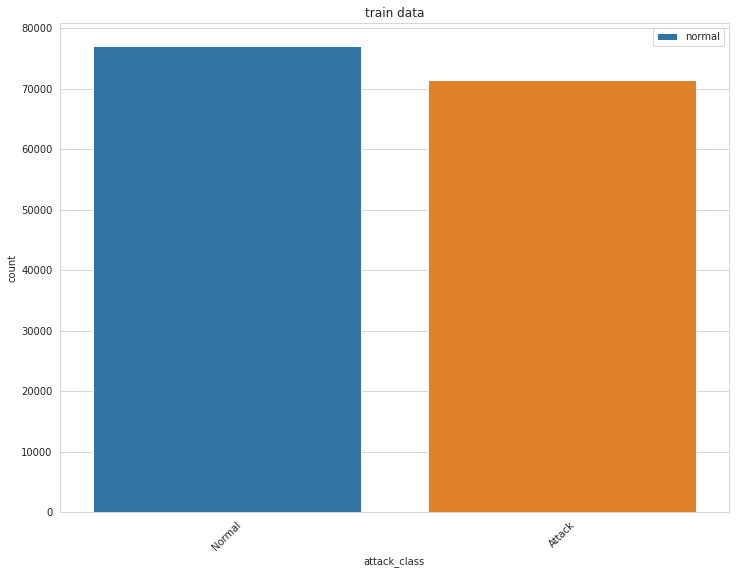

In [16]:
col_countplot('attack_class')

In [18]:
df_nsl['attack_class'].value_counts()

Normal    77022
Attack    71495
Name: attack_class, dtype: int64

In [22]:
df_nsl

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,attack_class
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,1,0,udp,other,SF,146,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Attack
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,22539,0,tcp,smtp,SF,794,333,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,Normal
148513,22540,0,tcp,http,SF,317,938,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,Normal
148514,22541,0,tcp,http,SF,54540,8314,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,Attack
148515,22542,0,udp,domain_u,SF,42,42,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


In [26]:
corr = df_nsl.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-26-40961db1fc3c>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
Unnamed: 0,1.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.01,-0.05,-0.01,0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,nan,-0.01,-0.03,0.00,-0.01,0.07,0.07,-0.06,-0.06,-0.03,-0.03,0.00,-0.02,-0.04,-0.03,-0.01,0.01,0.02,0.07,0.07,-0.06,-0.05,0.10
duration,0.00,1.00,0.07,0.03,-0.00,-0.01,0.00,0.00,0.00,-0.06,0.04,0.05,0.09,0.05,0.08,-0.00,0.07,nan,-0.00,-0.00,-0.08,-0.04,-0.06,-0.06,0.16,0.17,0.07,-0.02,-0.04,0.05,-0.10,-0.10,0.22,0.20,-0.03,-0.05,-0.05,0.14,0.16,-0.13
src_bytes,0.00,0.07,1.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.01,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.02
dst_bytes,0.00,0.03,0.00,1.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,0.01,0.01,-0.01
land,0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.00,-0.00,-0.01,-0.01,0.02,0.03,-0.01,-0.01,0.01,-0.00,0.04,-0.02,-0.02,0.01,-0.00,0.03,0.07,0.02,0.02,-0.01,-0.01,-0.03
wrong_fragment,0.01,-0.01,-0.00,-0.00,-0.00,1.00,-0.00,-0.01,-0.01,-0.07,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.00,-0.01,-0.02,0.02,-0.04,-0.05,-0.03,-0.03,0.05,-0.03,-0.02,0.03,-0.05,-0.05,0.05,0.04,-0.01,-0.05,-0.05,0.02,-0.03,-0.13
urgent,-0.00,0.00,-0.00,0.00,-0.00,-0.00,1.00,0.01,0.04,0.01,0.03,0.18,0.07,0.03,0.02,0.04,0.03,nan,-0.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00,0.01,0.00,0.01,-0.01,-0.01,-0.00,-0.00,-0.04
hot,0.01,0.00,0.00,-0.00,-0.00,-0.01,0.01,1.00,0.00,0.11,0.00,0.03,0.00,0.00,0.09,0.01,0.00,nan,0.01,0.72,-0.07,-0.03,-0.05,-0.05,-0.03,-0.03,0.07,-0.02,-0.03,-0.01,-0.05,-0.04,-0.01,-0.03,-0.02,-0.05,-0.05,-0.03,-0.03,-0.13
num_failed_logins,-0.05,0.00,-0.00,0.00,-0.00,-0.01,0.04,0.00,1.00,-0.04,0.01,0.02,0.04,0.01,0.01,-0.00,0.00,nan,0.01,0.08,-0.04,-0.02,-0.03,-0.03,-0.00,-0.00,0.04,-0.02,-0.02,0.01,-0.01,0.00,-0.01,-0.02,-0.01,-0.03,-0.03,-0.01,-0.00,-0.15
logged_in,-0.01,-0.06,-0.00,-0.00,-0.01,-0.07,0.01,0.11,-0.04,1.00,0.01,0.05,0.03,0.01,0.03,0.02,0.05,nan,0.01,0.12,-0.53,-0.20,-0.47,-0.46,-0.29,-0.29,0.59,-0.22,0.12,-0.39,0.62,0.60,-0.26,-0.18,-0.05,-0.47,-0.47,-0.29,-0.29,0.22


In [29]:
def corr(col1, col2="label", df=df_nsl):
    return df[[col1, col2]].corr().iloc[0,1]

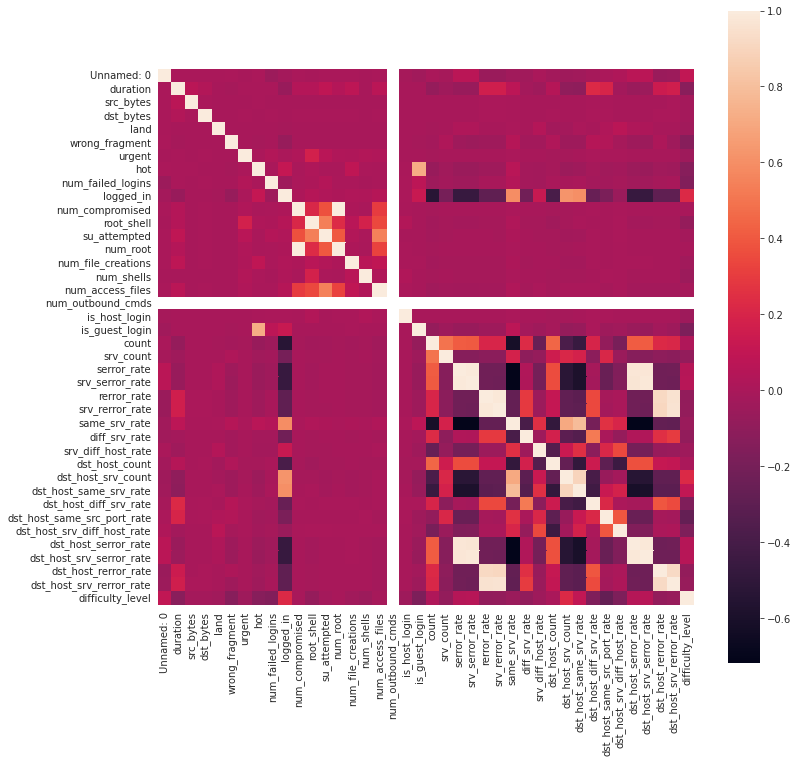

In [31]:
method = "pearson"
# correlation matrix
corr_mat = df_nsl.corr(method=method)
plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()